In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

In [58]:
ngb_df = pd.read_csv("tables_for_analysis/NGBooster_result.csv")
ngb_df["pred_sini"] = np.sin(ngb_df["pred_inc"])

In [59]:
merged_df = pd.read_csv("merged_elements.csv")
merged_df[merged_df["Des'n"] == "i2990"]["propa"]

/tmp/ipykernel_278660/221187010.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv("merged_elements.csv")


432338    2.427227
Name: propa, dtype: float64

In [60]:
propa = merged_df["propa"]
prope = merged_df["prope"]
propsini = merged_df["propsini"]

In [61]:
column_names = ['propa', 'prope', 'propsini', 'g', 's', 'H', 'NumOpps', 'PackedName', 'UnpackedName']
df_Hertha = pd.read_csv("family_tables/inner_135_hertha_fam3.csv", header=None, names=column_names)
df_Velleda = pd.read_csv("family_tables/inner_126_velleda_fam3.csv", header=None, names=column_names)
df_Moore_Sitterly = pd.read_csv("family_tables/inner_2110_moore_sitterly_fam3.csv", header=None, names=column_names)
def convert_id(val):
	val_str = str(val)
	if val_str.isdigit():
		return int(val_str)
	return val_str
df_Hertha["PackedName"] = df_Hertha["PackedName"].apply(convert_id)
df_Hertha

df_Velleda["PackedName"] = df_Velleda["PackedName"].apply(convert_id)
df_Velleda

df_Moore_Sitterly["PackedName"] = df_Moore_Sitterly["PackedName"].apply(convert_id)
df_Velleda

,propa,prope,propsini,g,s,H,NumOpps,PackedName,UnpackedName
0,2.438860,0.072280,0.045947,40.851255,-42.703906,9.30,63,126,126
1,2.441824,0.074053,0.045585,40.951172,-42.878256,17.03,15,M1071,221071
2,2.435232,0.073062,0.046095,40.759361,-42.565716,17.12,14,T6086,296086
3,2.438780,0.072035,0.043792,40.879475,-42.708727,17.90,13,V6285,316285
4,2.440053,0.074322,0.044979,40.913560,-42.815681,17.79,10,c9945,389945
...,...,...,...,...,...,...,...,...,...
303,2.331699,0.076564,0.050382,37.299052,-38.392160,16.93,17,D6551,136551
304,2.344087,0.075571,0.052807,37.696171,-38.834860,18.74,9,K16G46V,2016GV46
305,2.347829,0.073877,0.051834,37.839790,-38.950176,18.38,8,K08D92B,2008DB92
306,2.350263,0.074166,0.050439,37.948371,-39.052874,15.93,19,36971,36971


In [62]:
des = 135
target = merged_df[merged_df["Des'n"] == des].iloc[0]

In [63]:
name_list = df_Velleda["PackedName"]
family_df = merged_df[merged_df["Des'n"].isin(name_list)]

In [64]:
# Calculate the percentage of machine learning prediction still classifies asteroids into the family
family_pred_df = ngb_df[ngb_df["Des'n"].isin(name_list)]

def calculate_d(a_p, delta_a_p, delta_e_p, delta_sin_i_p):
	numerator = 3e4  # 3 × 10^4 m/s
	denominator = math.sqrt(a_p)
	term1 = (delta_a_p / a_p) ** 2
	term2 = 2 * (delta_e_p ** 2)
	term3 = 2 * (delta_sin_i_p ** 2)
	inside_sqrt = (5 / 4) * term1 + term2 + term3
	d = (numerator / denominator) * math.sqrt(inside_sqrt)
	return d

family_pred_df["delta_a_p"] = family_pred_df["propa"] - target["propa"]
family_pred_df["delta_e_p"] = (family_pred_df["pred_e"] + family_pred_df["e"]) - target["prope"]
family_pred_df["delta_sin_i_p"] = (family_pred_df["pred_inc"] + np.sin(family_pred_df['Incl.']*np.pi/180)) - target["propsini"]

family_pred_df["d"] = family_pred_df.apply(
	lambda row: calculate_d(
		row["propa"],
		row["delta_a_p"],
		row["delta_e_p"],
		row["delta_sin_i_p"]
	),
	axis=1
)

/tmp/ipykernel_278660/2074019848.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  family_pred_df["delta_a_p"] = family_pred_df["propa"] - target["propa"]
/tmp/ipykernel_278660/2074019848.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  family_pred_df["delta_e_p"] = (family_pred_df["pred_e"] + family_pred_df["e"]) - target["prope"]
/tmp/ipykernel_278660/2074019848.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [65]:
family_pred_df["pred_sini"] = np.sin(family_pred_df["pred_inc"])
family_pred_df["pred_sini"]

/tmp/ipykernel_278660/2505951298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  family_pred_df["pred_sini"] = np.sin(family_pred_df["pred_inc"])


1627      0.011076
3515      0.003809
4872     -0.006142
9336     -0.011239
12783    -0.010922
            ...   
491917   -0.010306
492563    0.014087
493368    0.003822
496061    0.011267
498806   -0.012121
Name: pred_sini, Length: 91, dtype: float64

In [66]:
test_name_list = ngb_df["Des'n"].to_list()
merged_df["pred_e"] = ngb_df["pred_e"]
merged_df["error_e"] = ngb_df["error_e"]
merged_df["pred_inc"] = ngb_df["pred_inc"]
merged_df["error_inc"] = ngb_df["error_inc"]
merged_df["pred_sini"] = ngb_df["pred_sini"]

In [ ]:
# create a slab enclosing all family members
def slab_d_calc(family_df_copy, family_pred_df_copy, merged_df, command):
	if command == "osculating":
		columns = {"a": "a", "e": "e", "sini": "Incl."}
	elif command == "proper":
		columns = {"a": "propa", "e": "prope", "sini": "propsini"}
	elif command == "pred":
		family_df_copy = family_pred_df_copy
		columns = {"a": "propa", "e": "pred_e", "sini": "pred_sini"}
	columns_bound = {"a": "propa", "e": "prope", "sini": "propsini"}

	adds = 0.01

	a_min, a_max = family_df_copy[columns_bound["a"]].min() - adds, family_df_copy[columns_bound["a"]].max() + adds
	e_min, e_max = family_df_copy[columns_bound["e"]].min() - adds, family_df_copy[columns["e"]].max() + adds
	sini_min, sini_max = family_df_copy[columns_bound["sini"]].min() - adds, family_df_copy[columns["sini"]].max() + adds

	slab_df = merged_df[
		(merged_df[columns["a"]] >= a_min) & (merged_df[columns["a"]] <= a_max) &
		(merged_df[columns["e"]] >= e_min) & (merged_df[columns["e"]] <= e_max) &
		(merged_df[columns["sini"]] >= sini_min) & (merged_df[columns["sini"]] <= sini_max)
	]

	a_family, e_family, sini_family, names = family_df_copy["propa"].values, family_df_copy["prope"].values, family_df_copy["propsini"].values, family_df_copy["Des'n"].values
	
	d_results = []
	for idx, row in slab_df.iterrows():
		a = row[columns["a"]]
		e = row[columns["e"]]
		sini = row[columns["sini"]]
		name = row["Des'n"]
		
		for a_f, e_f, sini_f, name_f in zip(a_family, e_family, sini_family, names):
			if name == name_f:
				continue
			else:
				da = a_f - a
				de = e_f - e
				dsini = sini_f - sini
				d = calculate_d(a, da, de, dsini)
				d_results.append({
					"name_asteroid": name,
					"name_family_asteroid": name_f,
					"d": d
				})
	d_df = pd.DataFrame(d_results)

	return d_df, len(family_df_copy["Des'n"])/len(slab_df["Des'n"])

d_df, ratio = slab_d_calc(family_df, family_pred_df, merged_df, "pred")
ratio

0.0011501371317349377

In [52]:
d_df["d"].min()

7.617602699458436

In [48]:
d_df

,name_asteroid,name_family_asteroid,d
0,126,1394,226.163231
1,126,3302,267.337840
2,126,4081,531.214282
3,126,6054,311.684778
4,126,6334,283.257557
...,...,...,...
170095,K23Q42D,K22S33O,1048.788672
170096,K23Q42D,K22S40V,1041.563066
170097,K23Q42D,K22SS1D,391.690903
170098,K23Q42D,K23M05P,891.619795


Text(0.5, 0.92, 'Proper Orbital Elements')

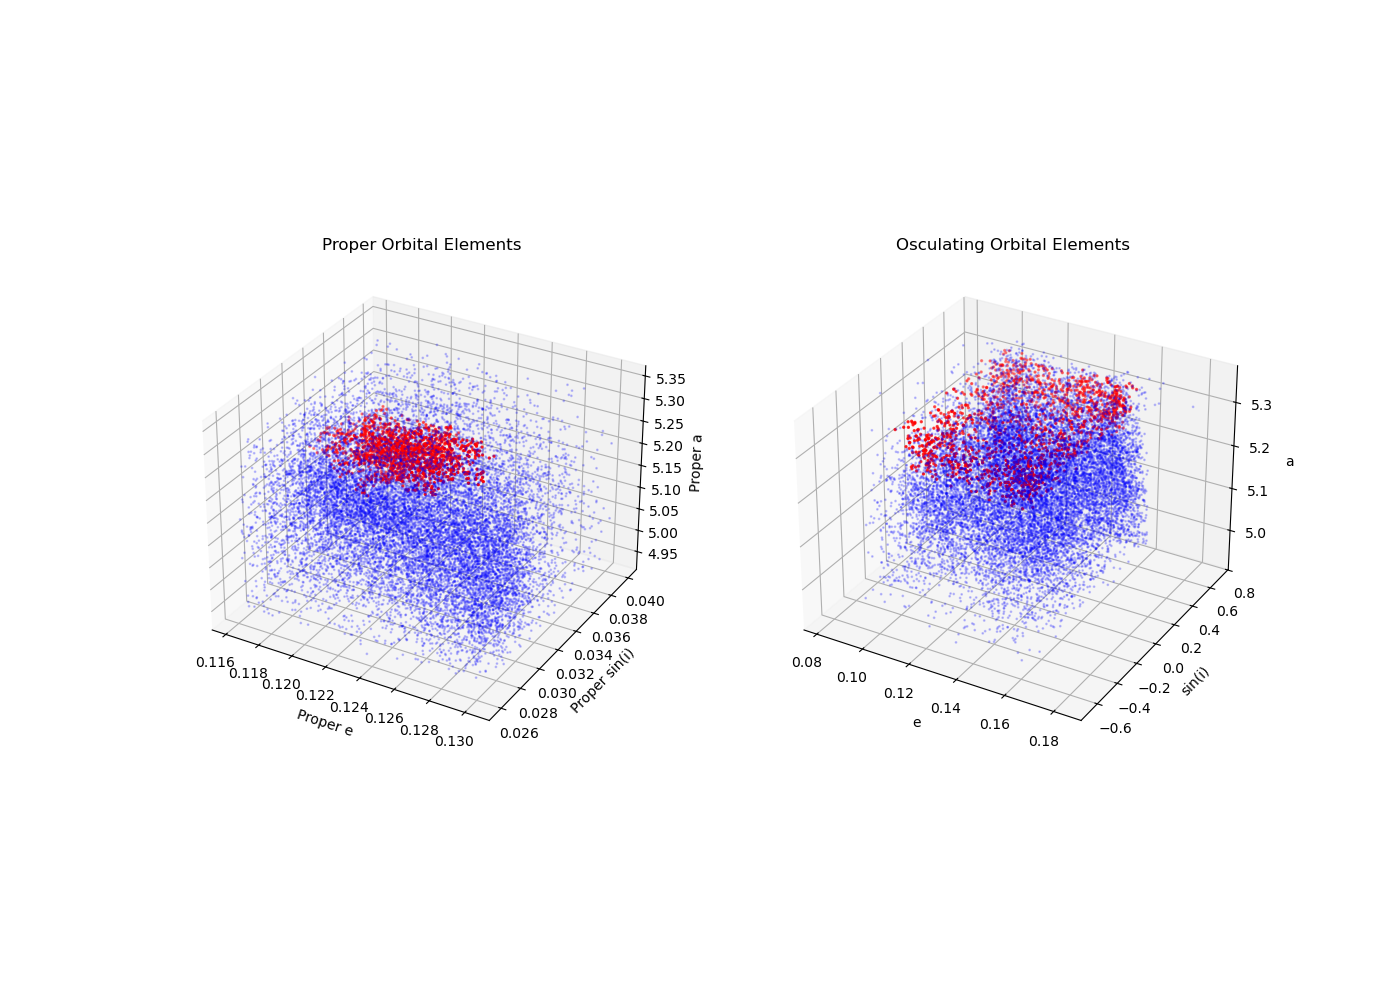

In [10]:
%matplotlib widget
threshold_e = 0.01
threshold_i = 0.01
filter = (propa < 2.5) & (propa > 2.3) & (prope < target["prope"] + threshold_e) & (prope > target["prope"] - threshold_e) & (propsini < target["propsini"] + threshold_i) & (propsini > target["propsini"] - threshold_i)
filtered = merged_df[filter]
filtered = filtered[~filtered["Des'n"].isin(name_list)]
fig = plt.figure(figsize=(14, 10))

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(filtered["e"] / np.sqrt(2), np.sin(filtered["Incl."]) / np.sqrt(2), filtered["a"] * 2.4 * np.sqrt(4/5), color="blue", s=1, alpha = 0.2, label="Filtered")
ax2.scatter(family_df["e"] / np.sqrt(2), np.sin(family_df["Incl."]) / np.sqrt(2), family_df["a"] * 2.4 * np.sqrt(4/5), color="red", s=2, label="Family")
ax2.set_xlabel("e")
ax2.set_ylabel("sin(i)")
ax2.set_zlabel("a")
ax2.set_title("Osculating Orbital Elements")

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(filtered["prope"] / np.sqrt(2), filtered["propsini"] / np.sqrt(2), filtered["propa"] * 2.4 * np.sqrt(4/5), color="blue", s=1, alpha = 0.2, label="Filtered")
ax1.scatter(family_df["prope"] / np.sqrt(2), family_df["propsini"] / np.sqrt(2), family_df["propa"] * 2.4 * np.sqrt(4/5), color="red", s=2, label="Family")
ax1.set_xlabel("Proper e")
ax1.set_ylabel("Proper sin(i)")
ax1.set_zlabel("Proper a")
ax1.set_title("Proper Orbital Elements")

# ax3 = fig.add_subplot(1, 2, 1, projection='3d')
# ax3.scatter(filtered["prope"] / np.sqrt(2), filtered["propsini"] / np.sqrt(2), filtered["propa"] * 2.4 * np.sqrt(4/5), color="blue", s=1, alpha = 0.2, label="Filtered")
# ax3.scatter((family_pred_df["pred_e"]+ family_pred_df["e"]) / np.sqrt(2), 
#             (family_pred_df["propsini"] + np.sin(family_pred_df['Incl.']*np.pi/180))/ np.sqrt(2), 
#             family_pred_df["propa"] * 2.4 * np.sqrt(4/5), color="red", s=2, label="Family")
# ax3.set_xlabel("Predicted proper e")
# ax3.set_ylabel("Predicted proper sin(i)")
# ax3.set_zlabel("Proper a")
# ax3.set_title("Proper Orbital Elements")

/home/miniconda3/envs/lshen/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arcsin
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/miniconda3/envs/lshen/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in arcsin
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_215303/732415670.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  family_df["Incl_deg"] = np.degrees(np.arcsin(family_df["Incl."]))


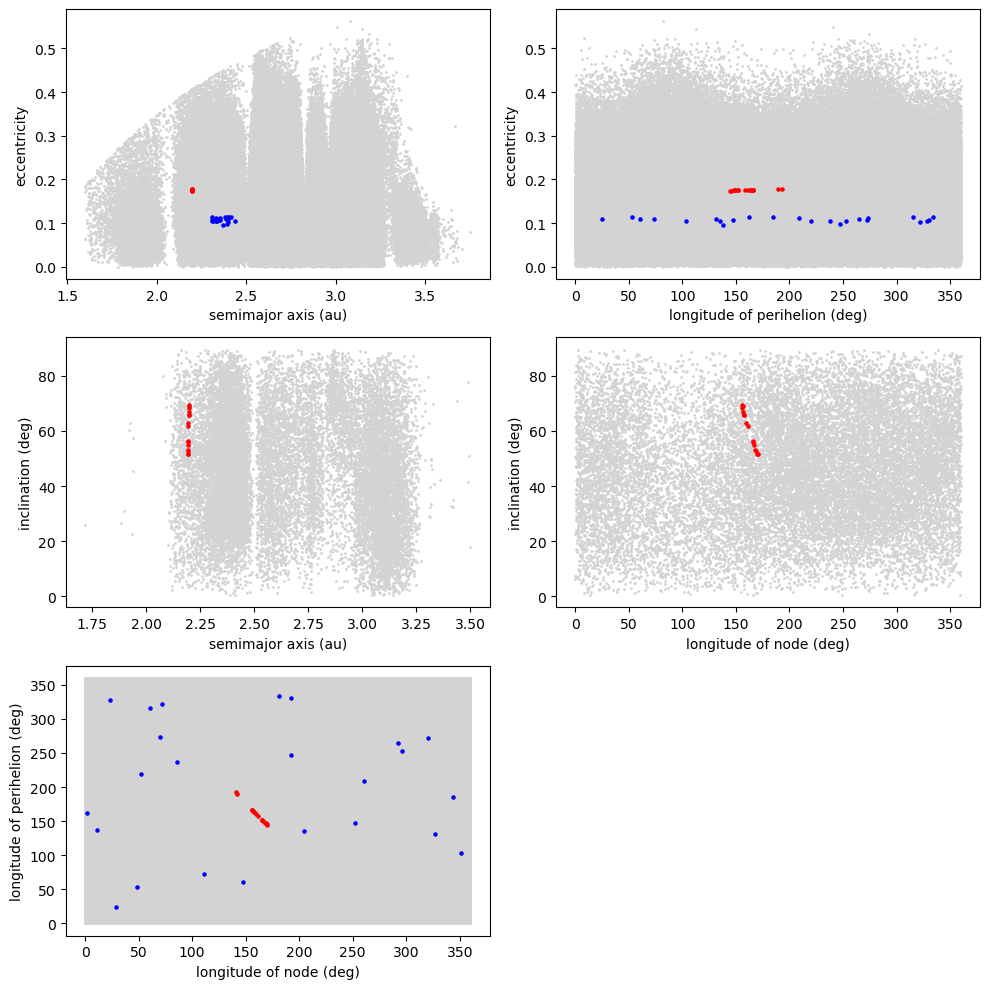

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

threshold_e = 0.01
threshold_i = 0.01
filter = (
	(merged_df["a"] < 2.5) & (merged_df["a"] > 2.3) &
	(merged_df["e"] < target["e"] + threshold_e) & (merged_df["e"] > target["e"] - threshold_e) &
	(merged_df["Incl."] < target["Incl."] + threshold_i) & (merged_df["Incl."] > target["Incl."] - threshold_i)
)

filtered = merged_df[filter].copy()
filtered["Incl_deg"] = np.degrees(np.arcsin(filtered["Incl."]))
family_df["Incl_deg"] = np.degrees(np.arcsin(family_df["Incl."]))

fig, axs = plt.subplots(3, 2, figsize=(10, 10))
axs = axs.flatten()

axs[0].scatter(merged_df["a"], merged_df["e"], color="lightgray", s=1)
axs[0].scatter(filtered["a"], filtered["e"], color="blue", s=5)
axs[0].scatter(family_df["a"], family_df["e"], color="red", s=5)
axs[0].set_xlabel("semimajor axis (au)")
axs[0].set_ylabel("eccentricity")

axs[1].scatter(merged_df["Peri."], merged_df["e"], color="lightgray", s=1)
axs[1].scatter(filtered["Peri."], filtered["e"], color="blue", s=5)
axs[1].scatter(family_df["Peri."], family_df["e"], color="red", s=5)
axs[1].set_xlabel("longitude of perihelion (deg)")
axs[1].set_ylabel("eccentricity")

axs[2].scatter(merged_df["a"], np.degrees(np.arcsin(merged_df["Incl."])), color="lightgray", s=1)
axs[2].scatter(filtered["a"], filtered["Incl_deg"], color="blue", s=5)
axs[2].scatter(family_df["a"], family_df["Incl_deg"], color="red", s=5)
axs[2].set_xlabel("semimajor axis (au)")
axs[2].set_ylabel("inclination (deg)")

axs[3].scatter(merged_df["Node"], np.degrees(np.arcsin(merged_df["Incl."])), color="lightgray", s=1)
axs[3].scatter(filtered["Node"], filtered["Incl_deg"], color="blue", s=5)
axs[3].scatter(family_df["Node"], family_df["Incl_deg"], color="red", s=5)
axs[3].set_xlabel("longitude of node (deg)")
axs[3].set_ylabel("inclination (deg)")

axs[4].scatter(merged_df["Node"], merged_df["Peri."], color="lightgray", s=1)
axs[4].scatter(filtered["Node"], filtered["Peri."], color="blue", s=5)
axs[4].scatter(family_df["Node"], family_df["Peri."], color="red", s=5)
axs[4].set_xlabel("longitude of node (deg)")
axs[4].set_ylabel("longitude of perihelion (deg)")

axs[5].axis("off")

plt.tight_layout()
plt.show()


In [39]:
target = merged_df[merged_df["Des'n"] == des].iloc[0]
target

Unnamed: 0.1          134
Unnamed: 0            134
Des'n                 135
H_x                  8.39
G                    0.15
Epoch               K239D
M                34.51442
Peri.           340.44092
Node            343.55574
Incl.             2.30318
e                0.207201
n                0.260403
a                2.428693
propa            2.428506
da               0.000001
prope            0.174326
de               0.000035
propsini         0.046521
dsini            0.000012
g               41.708511
s              -46.712515
H_y                  8.39
NumOpps                72
prope_h          0.174685
propsini_h       0.018515
g0               0.000032
ecospo           0.141317
esinpo          -0.102685
sinicosO          0.00031
sinisinO        -0.000091
s0              -0.000032
Name: 134, dtype: object